# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.



# Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')

except FileNotFoundError:
    data = pd.read_csv('games.csv')

In [3]:
data.shape

(16715, 11)

In [4]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12365,Seaman 2: Peking Genjin Ikusei Kit,PS2,2007.0,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN
3640,Rapala Tournament Fishing!,Wii,2006.0,Sports,0.51,0.00,0.00,0.04,NaN,NaN,NaN
7663,Forgotten Realms: Demon Stone,PS2,2004.0,Action,0.10,0.08,0.00,0.03,71.0,6.8,T
13160,Nounai Aeshe: IQ Suppli DS 2 - Sukkiri King Ke...,DS,2007.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN
12168,Shin Lucky * Star: Moe Drill ~Tabidachi~,DS,2007.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
10421,Gravity Games Bike: Street Vert Dirt,PS2,2002.0,Sports,0.05,0.04,0.00,0.01,24.0,4.1,T
14216,Zoo Vet: Endangered Animals,DS,2008.0,Simulation,0.03,0.00,0.00,0.00,NaN,tbd,E10+
4208,Metal Gear Solid: The Essential Collection,PS2,2007.0,Adventure,0.23,0.18,0.00,0.06,NaN,8.9,M
658,Monopoly,PC,1994.0,Misc,1.49,0.81,0.00,0.10,NaN,NaN,NaN
3777,Medal of Honor: European Assault,XB,2005.0,Shooter,0.32,0.19,0.00,0.02,72.0,7,T


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Genre                 2
Name                  2
Other_sales           0
JP_sales              0
EU_sales              0
NA_sales              0
Platform              0
dtype: int64

In [7]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [8]:
data['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [9]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
data['Name'].value_counts()

Need for Speed: Most Wanted                      12
LEGO Marvel Super Heroes                          9
Madden NFL 07                                     9
FIFA 14                                           9
Ratatouille                                       9
                                                 ..
WWF No Mercy                                      1
Sports Collection                                 1
Family Jockey                                     1
Fisherman's Bass Club                             1
From TV Animation One Piece: Treasure Battle!     1
Name: Name, Length: 11559, dtype: int64

## Вывод:

Много пропусков,

некорректный регистр в наименованиях столбцов и строк,

некорректный регистр данных в 'Name', Rating, Genre, Platform

в 'User_Score' кроме NaN присутствуют tbd, 

некорректные типы данных в 'Critic_Score', 'Year_of_Release' и 'User_Score'

# Подготовка данных

## Нормализация регистра

In [12]:
data.columns = data.columns.str.lower()

In [13]:
list_to_lower = ['name','platform','genre','rating']
for column in list_to_lower:
    data[column] = data[column].str.lower()

In [14]:
data['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Суммарные продажи:

Для дальнейшей обработки требуется информация о глобальных продажах. Добавлю столбец global_sales:

In [16]:
data['global_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Обработка пропусков

Проверю пропуски в name и genre:

In [17]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Пропуски в name и genre совпадают. Данные в этих строках практически отсутствуют, потому удалю их:

In [18]:
data = data.dropna(subset=['name'])

Проверю пропуски в столбце year_of_release:

In [19]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e,5.24
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e,3.50
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+,3.06
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+,0.01
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t,0.01
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m,0.01
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Обнаружено 269 строки с пропущенными значениями. Практически всё исследование строится вокруг года релиза и эти данные так или иначе не войдут в подсчёты, потому удалю их.

In [20]:
data = data.dropna(subset = ['year_of_release'])

## Обработка tbd:

Обработаю tbd в user_score (TDB - to be determined, англ. подлежит определению).

In [21]:
temp_tbd = data[data['user_score'] == 'tbd'] 
temp_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,e,6.70
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+,3.97
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,t,2.81
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,e,2.42
718,just dance kids,wii,2010.0,misc,1.52,0.54,0.0,0.18,NaN,tbd,e,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,e,0.01
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e,0.01
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e,0.01
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e,0.01


Посмотрю продажи в tbd 

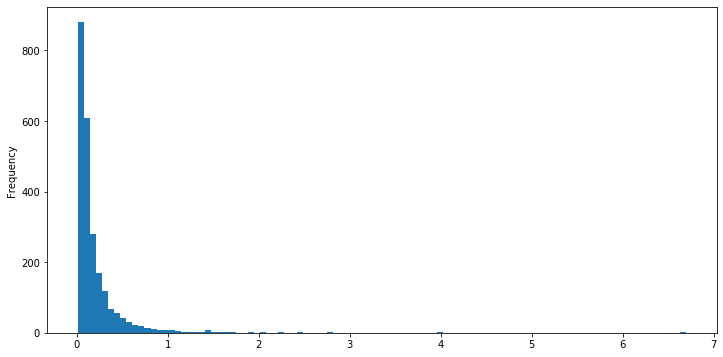

In [22]:
temp_tbd['global_sales'].plot(kind='hist', bins=100, figsize=(12,6))
plt.show()

Хотя большинство значений продаж находится у нулевой отметки, будет несправедливо, если поставлю ноль игре с хорошими продажами.
Поэтому посмотрю продажи в зависимости от оценок пользователей:

In [23]:
now_tbd = data[data['user_score'] != 'tbd']
now_tbd = now_tbd.dropna()
now_tbd['user_score'] = now_tbd.user_score.astype('float64')


<function matplotlib.pyplot.show(*args, **kw)>

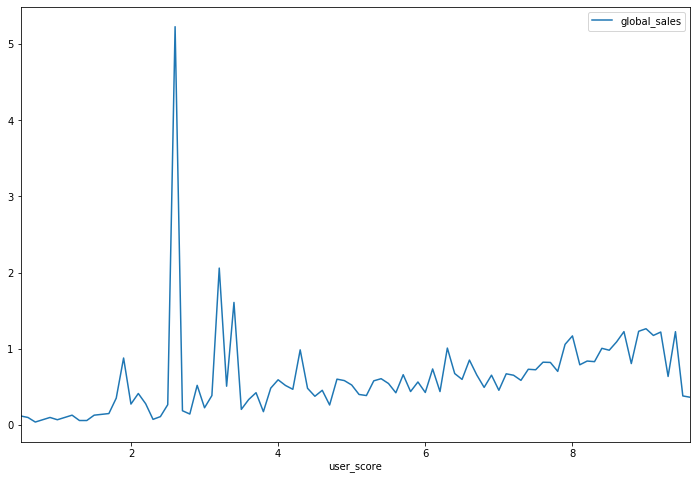

In [24]:
sales_now = now_tbd[['global_sales', 'user_score']]
sales_now.groupby('user_score').mean().plot(figsize=(12,8))
plt.show

Получилась некоторая зависимость с выбросами, которая не позволяет установить значения в tbd по этому признаку, потому заменю tbd на nan:

In [25]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales


## Типы данных

Заменю тип данных в year_of_release и critic_score на логичное int:

In [26]:
data['critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null object
global_sales       16444 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


In [27]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
8051,talkman (japan),psp,2005,misc,0.00,0.00,0.18,0.00,NaN,NaN,NaN,0.18
10150,fifa soccer 06,psp,2005,sports,0.10,0.00,0.00,0.01,77,7.7,e,0.11
13154,chameleon twist 2,n64,1998,platform,0.04,0.01,0.00,0.00,NaN,NaN,NaN,0.05
13832,samurai warriors 2: empires,x360,2007,action,0.03,0.00,0.01,0.00,53,8.5,t,0.04
8991,terraria,pc,2011,action,0.00,0.13,0.00,0.01,83,8.5,t,0.14
11018,nerf n-strike: double blast bundle,wii,2010,shooter,0.09,0.00,0.00,0.00,NaN,NaN,e10+,0.09
10978,agassi tennis generation,ps2,2003,sports,0.04,0.03,0.00,0.01,NaN,6.0,e,0.08
2333,killzone: liberation,psp,2006,shooter,0.44,0.27,0.00,0.18,77,8.3,t,0.89
9346,shiren the wanderer 4 - god's eye and the demo...,ds,2010,role-playing,0.00,0.00,0.13,0.00,NaN,NaN,NaN,0.13
9059,mtv music generator 3: this is the remix,ps2,2004,misc,0.07,0.05,0.00,0.02,79,8.6,t,0.14


## ESRB - возрастные рейтинги

«E» («Everyone») — «Для всех»<br>
K-A" ("Kids to Adults")<br>
«T» («Teen») — «Подросткам»<br>
«M» («Mature») — «Для взрослых»<br>
«AO» («Adults Only 18+») — «Только для взрослых»:<br>
E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше.<br>
«EC» («Early childhood») — «Для детей младшего возраста».<br>
«RP» («Rating Pending») — «Рейтинг ожидается».

In [28]:
data['rating'].value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

In [29]:
data[data['rating'] == 'rp']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
14270,supreme ruler: cold war,pc,2011,strategy,0.0,0.03,0.0,0.01,63,6.8,rp,0.04


«RP» («Rating Pending») удаляю по причине - Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [30]:
data = data[~(data['rating'] == 'rp')]
data[data['rating'] == 'rp']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales


Объединяю схожие рейтинги:<br>
«E» («Everyone») — «Для всех» + K-A" ("Kids to Adults"): объединяю т.к. это одна категория и добавлю схожую категорию + «EC» («Early childhood»)<br>
Объединяю схожие категории «M» («Mature») — «Для взрослых» + «AO» («Adults Only 18+») — «Только для взрослых».


In [31]:
data['rating'] = data['rating'].replace('k-a', 'e')
data['rating'] = data['rating'].replace('ec', 'e')
data['rating'] = data['rating'].replace('ao', 'm')

Рейтинг ESRB применим не во все странах, в некоторых странах рейтинг контента не требуется по закону, потому пропуски в rating помечу как произвольное - tinr (Рейтинг отсутствует). 

In [32]:
data.loc[data.loc[:,'rating'].isna(),'rating'] = 'tinr'

In [33]:
data['rating'].value_counts()

tinr    6676
e       3932
t       2905
m       1537
e10+    1393
Name: rating, dtype: int64

## Проверка распределения данных на нормальность:

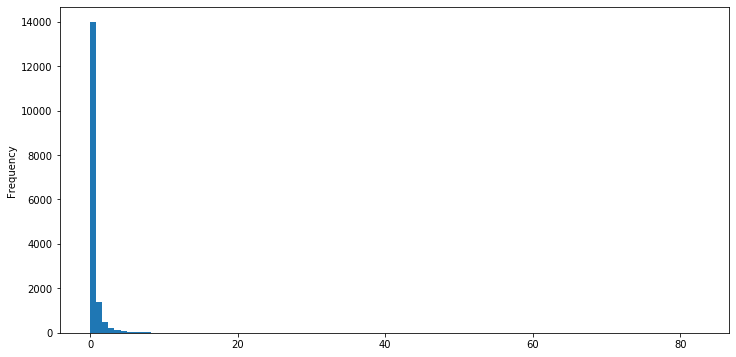

In [34]:
data['global_sales'].plot(kind='hist', bins=100, figsize=(12,6))
plt.show()

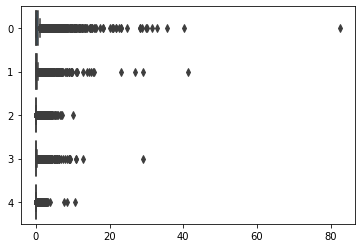

In [35]:
data_box = [data['global_sales'], data['na_sales'], data['jp_sales'], data['eu_sales'], data['other_sales']]
sns.boxplot(data=data_box, orient="h")
plt.show()

Посмотрю продажи популярных игр:

In [36]:
pop_game = (data[data['global_sales'] > 10]
                 .sort_values(by='global_sales', ascending=False))
pop_game[['name','platform', 'genre', 'global_sales']]

,name,platform,genre,global_sales
0,wii sports,wii,sports,82.54
1,super mario bros.,nes,platform,40.24
2,mario kart wii,wii,racing,35.52
3,wii sports resort,wii,sports,32.77
4,pokemon red/pokemon blue,gb,role-playing,31.38
...,...,...,...,...
57,grand theft auto iv,ps3,action,10.50
58,pokemon firered/pokemon leafgreen,gba,role-playing,10.49
59,super mario 64,ds,platform,10.30
60,call of duty: ghosts,x360,shooter,10.24


Обрежу усы до 3 млн.

In [37]:
ne_pop_game = (data[data['global_sales'] < 3]
            .sort_values(by='global_sales', ascending=False))
ne_pop_game[['name','platform', 'genre', 'global_sales']]

,name,platform,genre,global_sales
478,world soccer winning eleven 6 international,ps2,sports,2.99
479,devil may cry,ps2,action,2.99
476,star fox,snes,shooter,2.99
477,the sims: livin large,pc,misc,2.98
480,star wars: the old republic,pc,role-playing,2.97
...,...,...,...,...
16183,uta no * prince-sama: sweet serenade,psp,adventure,0.01
16184,higurashi no naku koro ni iki,ps3,action,0.01
16714,winning post 8 2016,psv,simulation,0.01
16676,g1 jockey 4 2008,ps3,sports,0.00


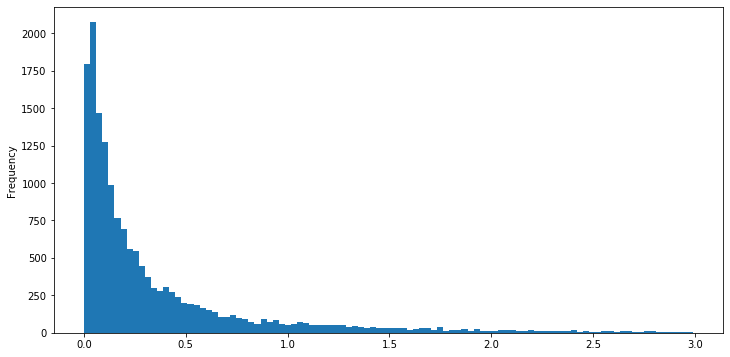

In [38]:
ne_pop_game['global_sales'].plot(kind='hist', bins=100, figsize=(12,6))
plt.show()

После удаления выбросов, данные распределяются нормально. Тем не менее в нашем случае, эти выбросы не связаны с ошибками ввода или иными техническими ошибками, это действительно реальные продажи по отдельным играм. Считаю, что достоверные данные не должны выглядеть идеальными, потому оставлю всё как есть.

Проверю дубликаты:

In [39]:
data.duplicated().sum()

0

## Игровые платформы:

In [40]:
data['platform'].value_counts()

ps2     2127
ds      2121
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1190
pc       956
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

ИГРОВЫЕ ПЛАТФОРМЫ - аппаратно-программные системы, позволяющие запускать интерактивные игровые приложения.


Среди основных видов можно выделить:
- Персональные компьютеры на базе Windows, Mac/OS X или Linux
- Игровые консоли (специализированные устройства для игр
- Мобильные устройства (iOS, Android,  Windows)
- Универсальные web платформы, социальные сети (FB, VK, MM)
- Аркадные автоматы
- Инновационные платформы виртуальной реальности.

В проекте представлены два вида игровых платформ - игровые консоли и персональные компьютеры.


## Игры

In [41]:
data['name'].value_counts()

need for speed: most wanted          12
fifa 14                               9
lego marvel super heroes              9
ratatouille                           9
madden nfl 08                         8
                                     ..
tsuyo kiss 3 portable                 1
the king of fighters xiv              1
peak performance                      1
space invaders extreme 2              1
gundam memories: tatakai no kioku     1
Name: name, Length: 11425, dtype: int64

В проекте представлено уникальных 11426 наименования игр. Одни и те же игры для разных консолей записаны по-разному, есть сборники 100 в 1.<br>
Разнообразие, которое не подлежит упорядочиванию. Как пример: 'world': 274, 'collection': 125, 'ultimate': 102<br>
Лемматизация не помогла. Оставлю как есть.


# Исследовательский анализ данных

## Ежегодные продажи игр за весь представленный период. Глобальный и региональные рынки:

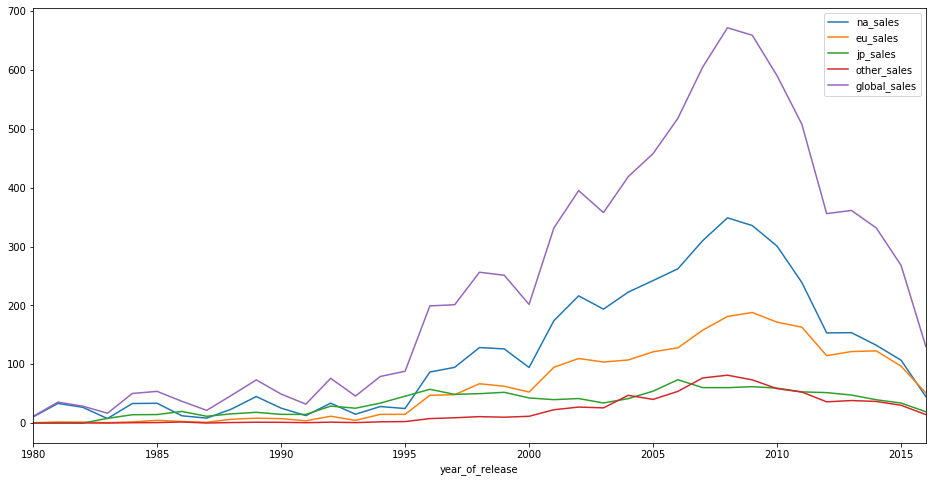

In [42]:
sales_ye = data[[x for x in data.columns if 'sales' in x] + ['year_of_release']]
sales_ye.groupby('year_of_release').sum().plot(figsize=(16,8))
plt.show()

Можно выделить 4 периода:<br>
1980 - 1990 зарождение игровой индустрии<br>
1990 - 2000 формирование рынков игровой индустрии<br>
2000 -2010 расцвет рынка игровой индустрии<br>
2010 - закат эпохи игровых консолей и обострение межвидовой борьбы. Победит сильнейший.

## Ежегодный релиз игр за весь период:

In [43]:
years_game = data.pivot_table(index='year_of_release', values=['name'], aggfunc='count')
years_game.reset_index(inplace=True)
years_game.columns = ['year_of_release', 'quantity']

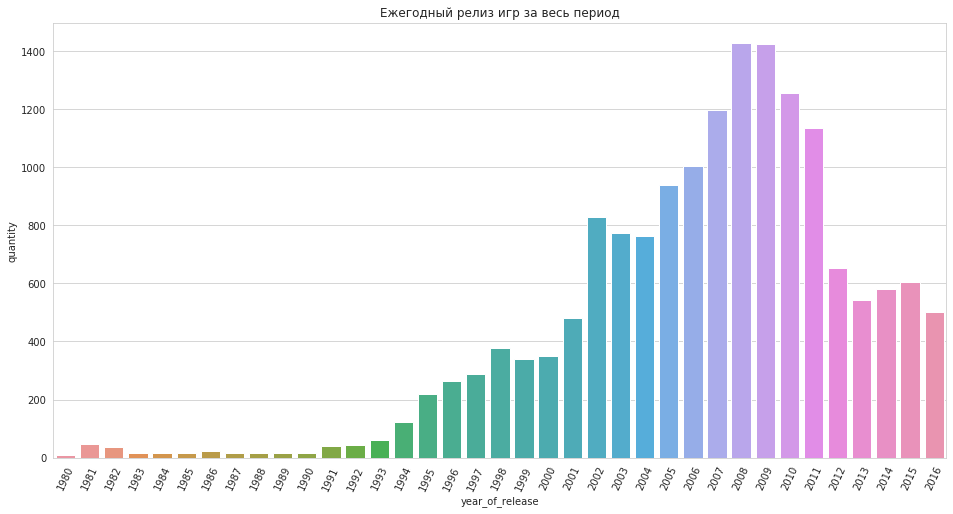

In [44]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.barplot(x="year_of_release", y="quantity", data=years_game)
plt.xticks(rotation = 65)
plt.title('Ежегодный релиз игр за весь период')
plt.show()

Начиная с 2013 года наблюдается стабилизация количества релизов. Что является обнадёживающей информацией для интернет-магазина "Стримчик".

Исторический ракурс интересен с познавательной точки зрения, но с точки зрения исследования данных необходимо выделить актуальный период.

## Продажи игр на топ 10 консолях по годам:


In [45]:
top10_platforms = data.groupby('platform').agg({'global_sales':'sum'}).sort_values(by = 'global_sales', ascending = False)[:10].index

In [46]:
data_sales_per_year = data.query('platform in @top10_platforms').pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')

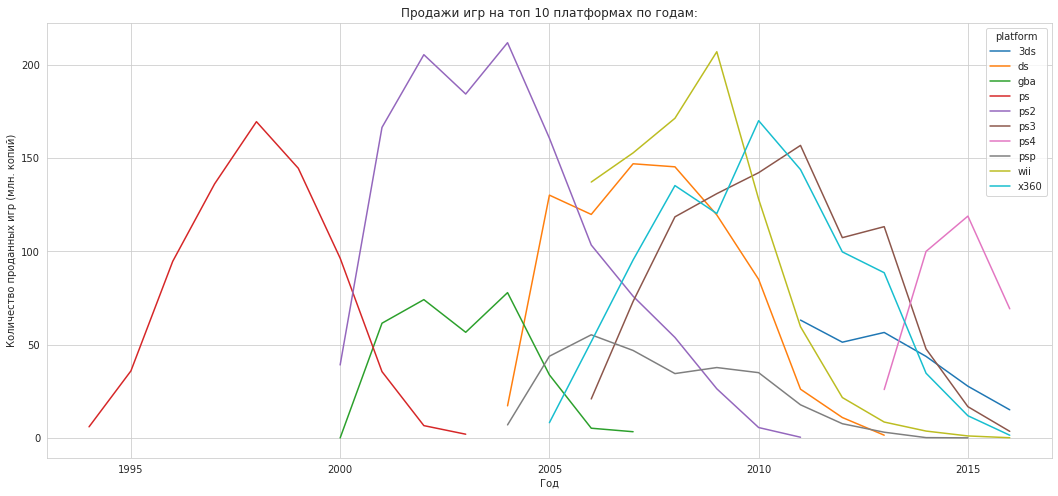

In [47]:
data_sales_per_year.plot(figsize=(18,8), grid=True)
plt.xlim(1993,2017)
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн. копий)')
plt.title('Продажи игр на топ 10 платформах по годам:')

plt.show()

Судя по графику, активная "жизнь" игровой консоли, по крайней мере из топ 10, длится 7 - 11 лет. Каждая новая консоль "убивает" предыдущую.  Чем больше появляется новых игровых консолей на рынке тем короче жизнь предыдущих моделей.

## Актуальный период

Прогнозы на основе статистических исследований исторических данных бессмысленны уже потому, что всякую тенденцию на рынке можно уловить и нельзя предсказать.  Но есть вещи, которые носят фундаментальный характер, и не меняются на протяжении всей человеческой цивилизации - люди требуют хлеба и зрелищ. Потому, попытаюсь помочь интернет магазину в частичном удовлетворении этих нужд.<br>
В корне неверная методика определять актуальный период как среднее время жизни игровых консолей. В этом утверждении я исхожу из следующих соображений:<br>
- Новые консоли, как правило, поддерживают игры от предыдущих консолей. Купив новую консоль, человек продолжает покупать игры от предыдущей модели, потому что эти игры значительно дешевле новых. Тем самым, создаётся иллюзия актуальности предыдущей модели.<br>
- На падающем рынке, получаем завышенное ожидание, что может привести к убыткам, на растущем рынке, получаем заниженное ожидание, что может привести к меньшей прибыли против теоретически возможной. В любом варианте, прибыль лучше убытков.<br>

Я придерживаюсь осторожной тактики и потому лучше перестраховаться, и в качестве актуального периода возьму показатели за последние 3 года + 2016 незаконченный, где сформировалась тенденция к положительной стабилизации продаж.

In [48]:
data_actual = data[data['year_of_release'] > 2012]
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null Int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null Int64
user_score         1192 non-null float64
rating             2233 non-null object
global_sales       2233 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.2+ KB


In [49]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,tinr,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,tinr,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62


## Платформы - Игры: Продажи и средняя успешность.

### Продажа игр по платформам

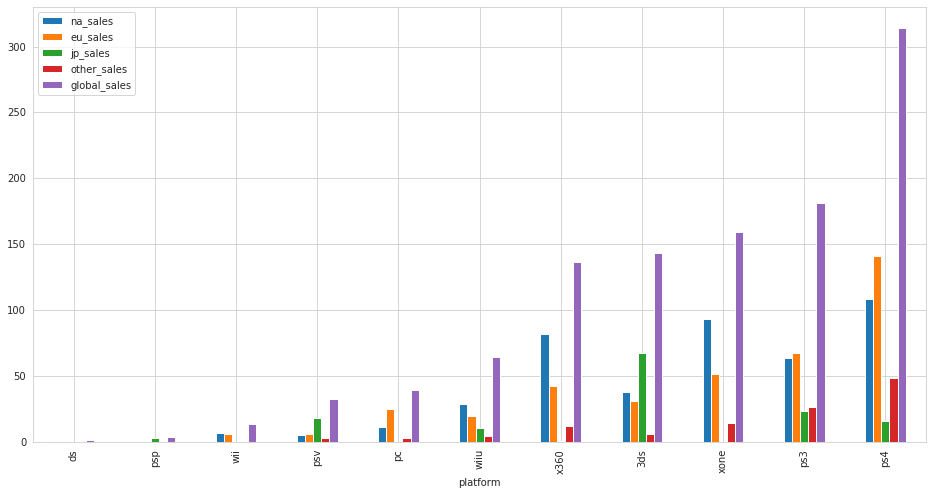

In [50]:
sales_platform = data_actual[[x for x in data.columns if 'sales' in x] + ['platform']]
sales_platform = sales_platform.groupby('platform').sum().sort_values('global_sales')
sales_platform.plot.bar(figsize=(16,8))
plt.show()

### Топ 5 игровых консолей.

In [51]:
top5_platforms_actual = data_actual.groupby('platform').agg({'global_sales':'sum'}).sort_values(by = 'global_sales', ascending = False)[:5].index

In [52]:
top5_platforms_actual

Index(['ps4', 'ps3', 'xone', '3ds', 'x360'], dtype='object', name='platform')

In [53]:
data_sales_per_year_actual = data_actual.query('platform in @top5_platforms_actual').pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')

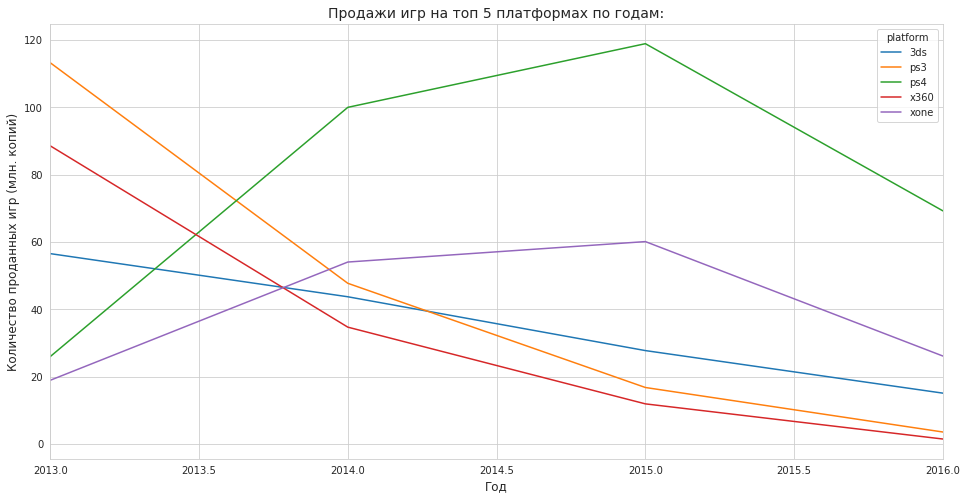

In [54]:
data_sales_per_year_actual.plot(figsize=(16,8), grid=True)
plt.xlim(2013,2016)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество проданных игр (млн. копий)', fontsize=12)
plt.title('Продажи игр на топ 5 платформах по годам:', fontsize=14)

plt.show()

По общим продажам за актуальный период лидируют PS4 и PS3, но если смотреть в динамике, то PS3 и X360 сдают позиции, тогда как PS4 и XONE даже слегка увеличили продажи.

### Средний успех релиза по консолям

In [55]:
sales_platform = sales_platform.sort_values(by='global_sales', ascending=False).reset_index()

In [56]:
sales_platform

,platform,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,ps4,108.74,141.09,15.96,48.35,314.14
1,ps3,63.50,67.81,23.35,26.77,181.43
2,xone,93.12,51.59,0.34,14.27,159.32
3,3ds,38.20,30.96,67.81,6.28,143.25
4,x360,81.66,42.52,0.51,12.11,136.80
5,wiiu,29.21,19.85,10.88,4.69,64.63
6,pc,11.11,25.36,0.00,2.96,39.43
7,psv,5.04,6.10,18.59,3.26,32.99
8,wii,6.56,5.93,0.05,1.12,13.66
9,psp,0.00,0.17,3.29,0.04,3.50


Количество релизов по консолям:

In [57]:
sales_pf=data_actual['platform'].value_counts().reset_index()
sales_pf.columns=['platform', 'count_game']
sales_pf

,platform,count_game
0,ps4,392
1,psv,358
2,ps3,345
3,3ds,303
4,xone,247
5,pc,189
6,x360,186
7,wiiu,115
8,psp,67
9,wii,23


Среднее количество проданных игр на каждый релиз по платформам:

In [58]:
data_frames = [sales_platform, sales_pf]
dt_platform = reduce(lambda left,right: pd.merge(left,right,on=['platform'], how='outer'), data_frames)
dt_platform = dt_platform.reset_index()

In [59]:
dt_platform['success_game_platf'] = dt_platform['global_sales'] / dt_platform['count_game']
dt_platform.sort_values('success_game_platf', ascending=False)

,index,platform,na_sales,eu_sales,jp_sales,other_sales,global_sales,count_game,success_game_platf
0,0,ps4,108.74,141.09,15.96,48.35,314.14,392,0.801378
4,4,x360,81.66,42.52,0.51,12.11,136.80,186,0.735484
2,2,xone,93.12,51.59,0.34,14.27,159.32,247,0.645020
8,8,wii,6.56,5.93,0.05,1.12,13.66,23,0.593913
5,5,wiiu,29.21,19.85,10.88,4.69,64.63,115,0.562000
1,1,ps3,63.50,67.81,23.35,26.77,181.43,345,0.525884
3,3,3ds,38.20,30.96,67.81,6.28,143.25,303,0.472772
6,6,pc,11.11,25.36,0.00,2.96,39.43,189,0.208624
10,10,ds,0.57,0.85,0.00,0.12,1.54,8,0.192500
7,7,psv,5.04,6.10,18.59,3.26,32.99,358,0.092151


По показателю "Средний успех релиза" - впереди PS4 и X360.

### Диаграмма размаха

Посмотрю, что покажет диаграмма размаха по глобальным продажам в разбивке по платформам.

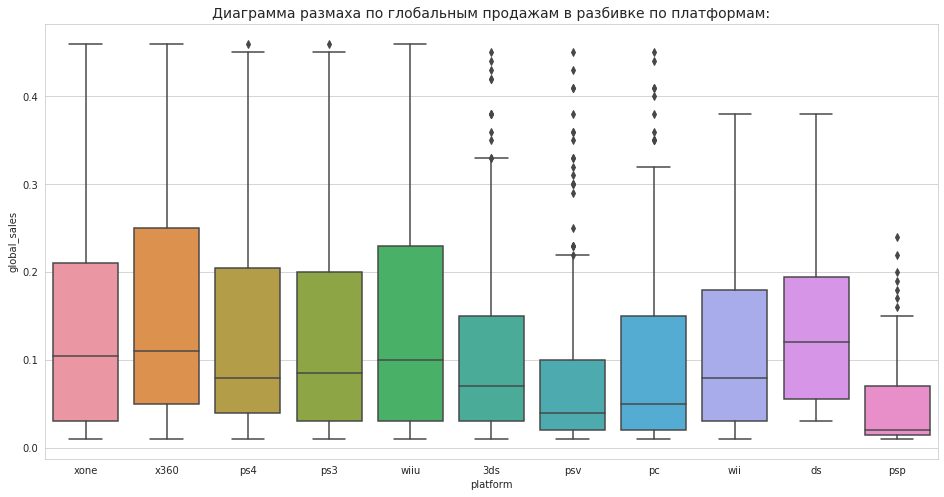

In [60]:
top_quantile = data_actual['global_sales'].quantile(0.75)
low_quantile = data_actual['global_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(16,8))
sns.boxplot(x = 'platform',
            y = 'global_sales',
            data = data_actual.query('global_sales <= @threshold'),ax=ax)
plt.title('Диаграмма размаха по глобальным продажам в разбивке по платформам:', fontsize=14)
plt.show()

 Диаграмма размаха показывает, что почти у всех консолей высокая степень разброса данных, широкий межквартильный размах и медиана находится в нижней части боксплота. Из этого можно сделать вывод, что небольшое количество суперпопулярных игр вытягивают в целом рынок игровой индустрии.

## Жанры - Игры: Продажи и средняя успешность.

### Продажа игр в разбивке по жанрам по глобальному и региональному рынкам.

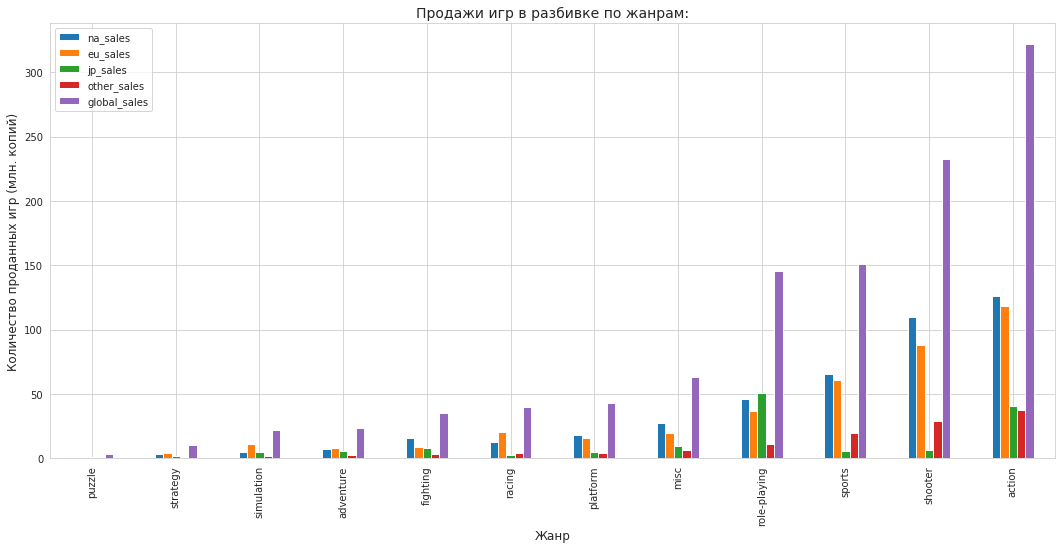

In [61]:
sales_genre = data_actual[[x for x in data.columns if 'sales' in x] + ['genre']]
sales_genre = sales_genre.groupby('genre').sum().sort_values('global_sales')
sales_genre.plot.bar(figsize=(18,8))
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество проданных игр (млн. копий)', fontsize=12)
plt.title('Продажи игр в разбивке по жанрам:', fontsize=14)
plt.show()

### Лидеры жанра

In [62]:
sales_genre.sort_values(by='global_sales', ascending=False).reset_index()

,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,action,126.05,118.13,40.49,37.20,321.87
1,shooter,109.74,87.86,6.61,28.77,232.98
2,sports,65.27,60.52,5.41,19.45,150.65
3,role-playing,46.40,36.97,51.04,11.48,145.89
4,misc,27.49,20.04,9.20,6.09,62.82
5,platform,18.14,15.58,4.79,4.12,42.63
6,racing,12.96,20.19,2.30,4.44,39.89
7,fighting,15.55,8.55,7.65,3.56,35.31
8,adventure,7.14,8.25,5.82,2.43,23.64
9,simulation,4.86,10.92,4.52,1.46,21.76


Лидеры жанра определились. И эти предпочтения вряд ли изменятся в ближайшие годы.

In [63]:
sales_gr=data_actual['genre'].value_counts().reset_index()
sales_gr.columns=['genre', 'count_game']
sales_gr

,genre,count_game
0,action,766
1,role-playing,292
2,adventure,245
3,sports,214
4,shooter,187
5,misc,155
6,racing,85
7,fighting,80
8,platform,74
9,simulation,62


Средняя успешность релиза по жанрам:

In [64]:
data_frames = [sales_genre, sales_gr]
dt_genre = reduce(lambda left,right: pd.merge(left,right,on=['genre'], how='outer'), data_frames)
dt_genre = dt_genre.reset_index()

In [65]:
dt_genre['success_game_genre'] = dt_genre['global_sales'] / dt_genre['count_game']
dt_genre.sort_values('success_game_genre', ascending=False)

,index,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,count_game,success_game_genre
10,10,shooter,109.74,87.86,6.61,28.77,232.98,187,1.245882
9,9,sports,65.27,60.52,5.41,19.45,150.65,214,0.703972
6,6,platform,18.14,15.58,4.79,4.12,42.63,74,0.576081
8,8,role-playing,46.40,36.97,51.04,11.48,145.89,292,0.499623
5,5,racing,12.96,20.19,2.30,4.44,39.89,85,0.469294
4,4,fighting,15.55,8.55,7.65,3.56,35.31,80,0.441375
11,11,action,126.05,118.13,40.49,37.20,321.87,766,0.420196
7,7,misc,27.49,20.04,9.20,6.09,62.82,155,0.405290
2,2,simulation,4.86,10.92,4.52,1.46,21.76,62,0.350968
0,0,puzzle,0.83,1.00,1.18,0.16,3.17,17,0.186471


### Средний успех релиза по жанрам

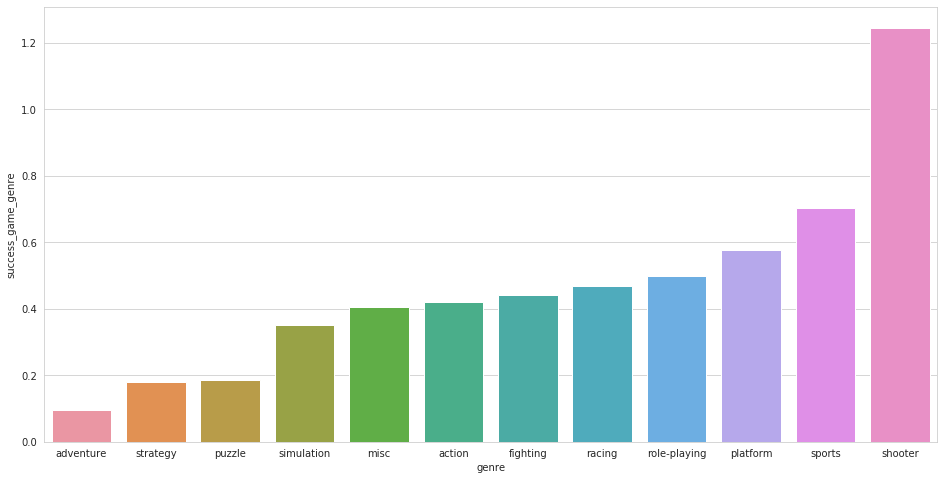

In [66]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.barplot(x="genre", y="success_game_genre", data=dt_genre.sort_values('success_game_genre'))
plt.show()

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Отлично. Ты правильно определил жанры, приносящие высокий доход.

</div>

По показателю успешность, action сместился вниз. Это говорит о том, что большинство релизов в этом жанре не найдёт своего покупателя.

## Рейтинги - Игры: Продажи и средняя успешность.

### Продажа игр в разбивке по рейтингу по глобальному и региональному рынкам.

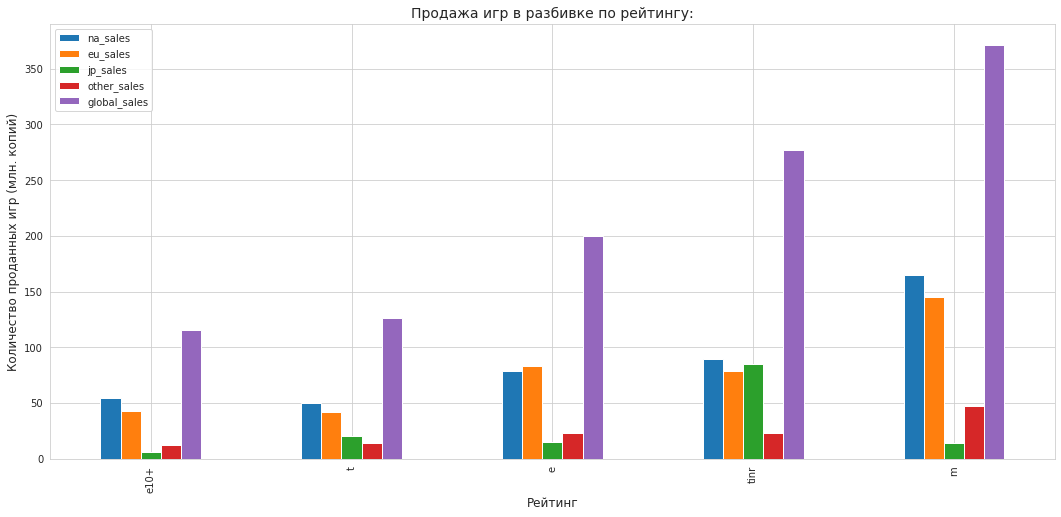

In [67]:
sales_rating = data_actual[[x for x in data.columns if 'sales' in x] + ['rating']]
sales_rating = sales_rating.groupby('rating').sum().sort_values('global_sales')
sales_rating.plot.bar(figsize=(18,8))

plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество проданных игр (млн. копий)', fontsize=12)
plt.title('Продажа игр в разбивке по рейтингу:', fontsize=14)

plt.show()

Продажи игр по возрастному рейтингу сосредоточены в категориях "Для взрослых", "Без рейтинга", "Для всех", что неудивительно исходя из предпочтений игровых жанров.

In [68]:
sales_rating.sort_values(by='global_sales', ascending=False).reset_index()

,rating,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,m,165.21,145.32,14.11,47.04,371.68
1,tinr,89.42,78.91,85.05,23.46,276.84
2,e,79.05,83.36,15.14,22.61,200.16
3,t,49.79,41.95,20.59,14.29,126.62
4,e10+,54.24,42.69,5.89,12.57,115.39


In [69]:
sales_rt=data_actual['rating'].value_counts().reset_index()
sales_rt.columns=['rating', 'count_game']
sales_rt

,rating,count_game
0,tinr,977
1,m,369
2,t,333
3,e,302
4,e10+,252


In [70]:
data_frames = [sales_rating, sales_rt]
dt_rating = reduce(lambda left,right: pd.merge(left,right,on=['rating'], how='outer'), data_frames)
dt_rating = dt_rating.reset_index()

In [71]:
dt_rating['success_game_rating'] = dt_rating['global_sales'] / dt_rating['count_game']
dt_rating.sort_values('success_game_rating', ascending=False)

,index,rating,na_sales,eu_sales,jp_sales,other_sales,global_sales,count_game,success_game_rating
4,4,m,165.21,145.32,14.11,47.04,371.68,369,1.007263
2,2,e,79.05,83.36,15.14,22.61,200.16,302,0.662781
0,0,e10+,54.24,42.69,5.89,12.57,115.39,252,0.457897
1,1,t,49.79,41.95,20.59,14.29,126.62,333,0.380240
3,3,tinr,89.42,78.91,85.05,23.46,276.84,977,0.283357


### Средний успех релиза по рейтингу

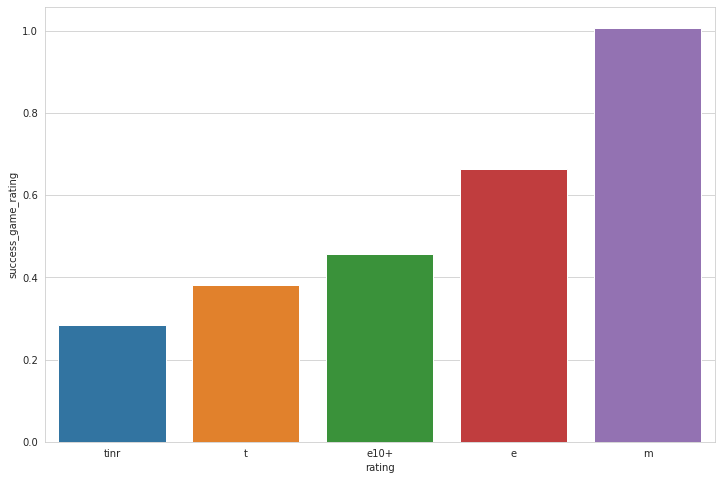

In [72]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x="rating", y="success_game_rating", data=dt_rating.sort_values('success_game_rating'))
plt.show()

Игры без рейтига показали наихудший результат, не смотря на достаточно хорошие продажи.

## Влияние оценок пользователей и критиков на продажи игр

Прежде чем посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, необходимо составить общее представление о взаимосвязи оценок пользователей и критиков с продажами игр.

### Подготовка таблиц:

In [73]:
critic=data[['platform', 'genre', 'critic_score', 'global_sales']]
critic=critic.dropna()

In [74]:
user_sc = data[['platform', 'genre', 'user_score', 'global_sales']]
user_sc = user_sc.dropna()

Оценки пользователей приведены в 10-й бальной системе, приведу их к 100 бальной системе для удобства сравнения:

In [75]:
user_sc['user_score'] = (user_sc['user_score'] * 10).astype(int)

In [76]:
critic['critic_score'] = critic['critic_score'] .astype(int)

Посмотрю коэффициент корреляции между оценками критиков и пользователей:

In [77]:
print('Коэффициент корреляции:', critic['critic_score'].corr(user_sc['user_score']))

Коэффициент корреляции: 0.579664873079938


Обнаружена средняя корреляция.

In [78]:
sales_critic = critic.groupby('critic_score').sum().sort_values('global_sales')

In [79]:
sales_critic_count=critic['critic_score'].value_counts().reset_index()
sales_critic_count.columns=['critic_score', 'count_game']

In [80]:
data_frames = [sales_critic, sales_critic_count]
dt_critic = reduce(lambda left,right: pd.merge(left,right,on=['critic_score'], how='outer'), data_frames)
dt_critic = dt_critic.reset_index()
dt_critic['success_game'] = dt_critic['global_sales'] / dt_critic['count_game']

### Взаимосвязь оценок критиков с продажами

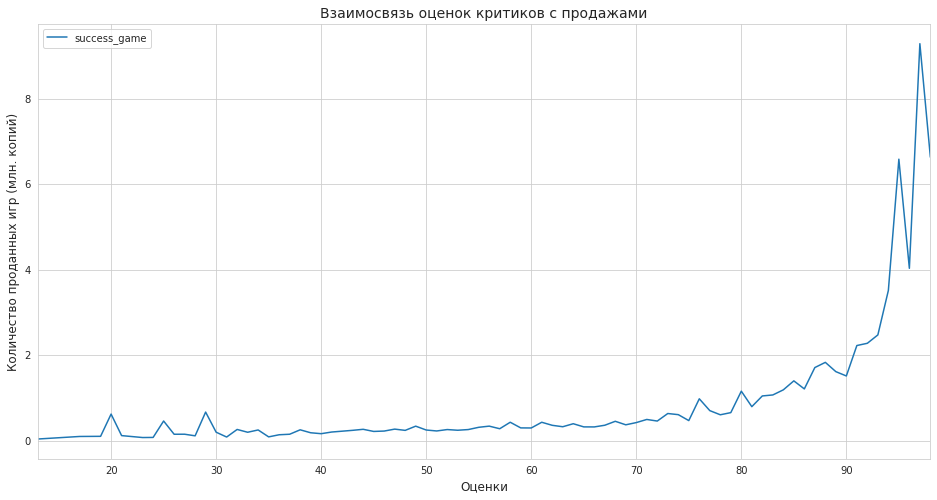

In [81]:
dt_critic = dt_critic.sort_values('critic_score')
dt_critic.plot(y='success_game', x='critic_score', figsize=(16,8))
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Количество проданных игр (млн. копий)', fontsize=12)
plt.title('Взаимосвязь оценок критиков с продажами', fontsize=14)
plt.show()

In [82]:
sales_user_sc = user_sc.groupby('user_score').sum().sort_values('global_sales')

In [83]:
sales_user_count=user_sc['user_score'].value_counts().reset_index()
sales_user_count.columns=['user_score', 'count_game']

In [84]:
data_frames = [sales_user_sc, sales_user_count]
dt_user_sc = reduce(lambda left,right: pd.merge(left,right,on=['user_score'], how='outer'), data_frames)
dt_user_sc = dt_user_sc.reset_index()
dt_user_sc['success_game'] = dt_user_sc['global_sales'] / dt_user_sc['count_game']

### Взаимосвязь оценок пользователей с продажами

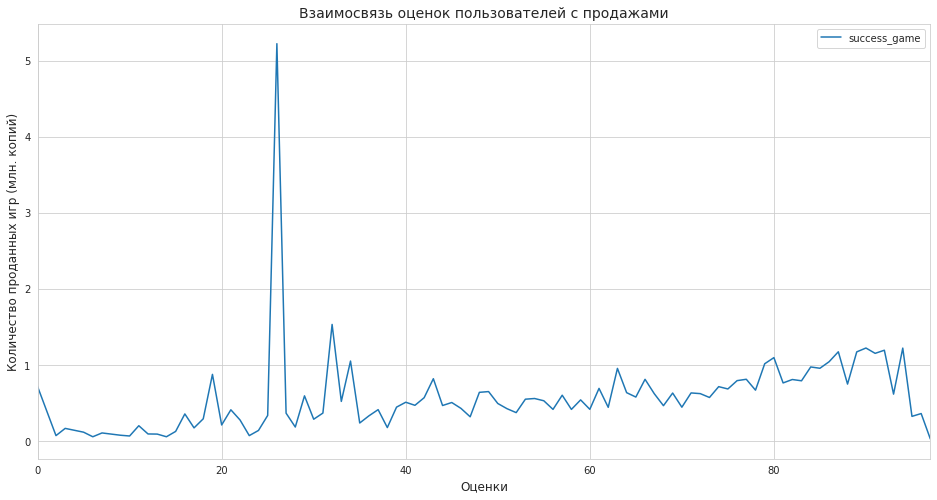

In [85]:
dt_user_sc = dt_user_sc.sort_values('user_score')
dt_user_sc.plot(y='success_game', x='user_score', figsize=(16,8))
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Количество проданных игр (млн. копий)', fontsize=12)
plt.title('Взаимосвязь оценок пользователей с продажами', fontsize=14)
plt.show()

### Текущий вывод:
Исходя из полученных графиков в целом оценки профессиональных критиков соответствуют продажам игр, оценки пользователей субъективны и не соответствуют продажам игр.

### Влияние отзывов критиков и пользователей на продажи игр по консоли PS4

В качестве исследуемого объекта выберу популярную консоль PS4.

In [86]:
ps4 = data_actual.query('platform == "ps4"').dropna()
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,e,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,m,7.17


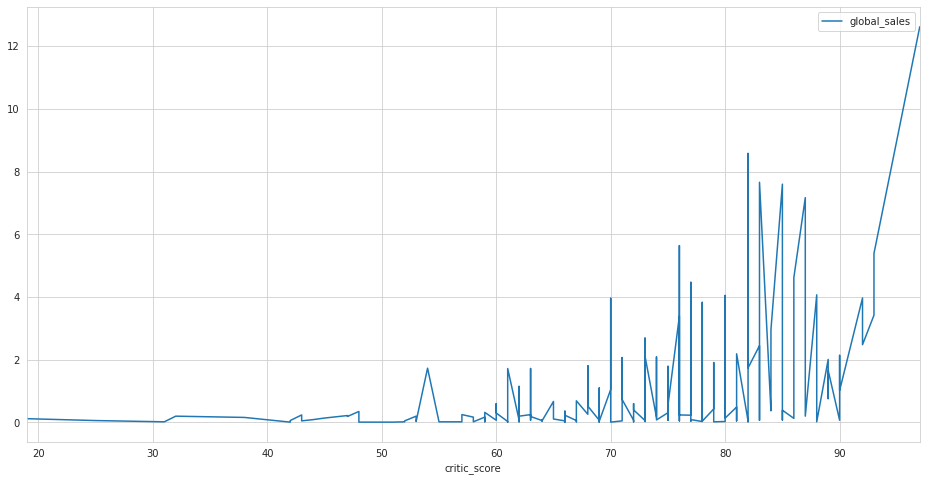

In [87]:
critic_ps4 = ps4.sort_values('critic_score')
critic_ps4.plot(y='global_sales', x='critic_score', figsize=(16,8))
plt.show()

Обнаруживается взаимосвязь продаж от оценок критиков. 

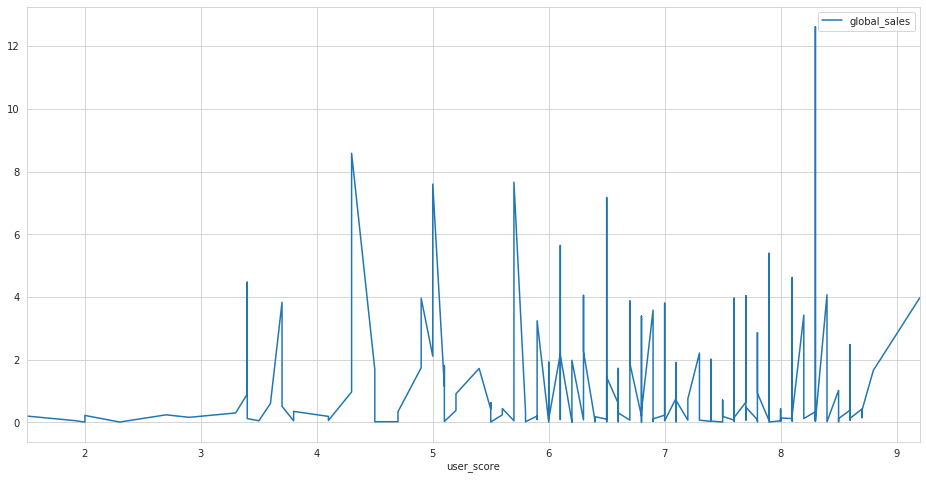

In [88]:
user_sc_ps4 = ps4.sort_values('user_score')
user_sc_ps4.plot(y='global_sales', x='user_score', figsize=(16,8))
plt.show()

Не обнаруживается взаимосвязь оценки пользователей с продажами.

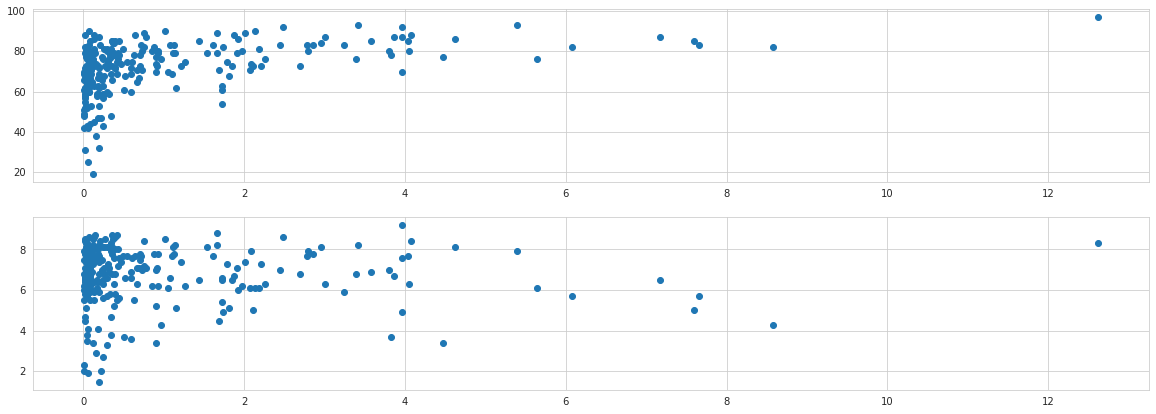

In [89]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,7))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =data_actual.query('platform == "ps4"').dropna())
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =data_actual.query('platform == "ps4"').dropna())
plt.show()

In [90]:
ps4_critic_score = critic.query('platform == "ps4"')['critic_score']
ps4_user_score = user_sc.query('platform == "ps4"')['user_score']
ps4_total_sales = data_actual.query('platform == "ps4"')['global_sales']

Диаграмма рассеяния показывает взаимосвязь оценок критиков с продажами и отсутствие таковой у пользователей. 

In [91]:
print(ps4_critic_score.corr(ps4_total_sales))
print(ps4_user_score.corr(ps4_total_sales))

0.40656790206178095
-0.031957110204556445


Обнаружена слабая, ближе  к среднней корреляция оценок критиков с продажами игр на консоли PS4 и отсутствие корреляции с легой отрицательной направленностью у оценок пользователей с продажами игр на консоли PS4.

### Вывод:

Проведенное исследование показывает, что три метода однозначно указывают на взаимосвязь оценок критиков  с продажами консолей PS4 и отсутствие взаимосвязи оценок пользователей с продажами консолей.
И этот частный вывод подтвежрдается общим выводом по всем продажам во взаимосвязи с оценками критиков и пользователей.

# Портрет пользователя

## Различия в долях продаж игр на платформе для каждого региона:

### Североамериканский регион:

In [92]:
platform_na_sales = sales_platform[['platform', 'na_sales']]

In [93]:
platform_na_sales['doly_na_sales, %'] = (platform_na_sales['na_sales'] / platform_na_sales['na_sales'].sum() * 100).round(2)
top5_platform_na_sales = platform_na_sales.sort_values(by = 'na_sales', ascending = False).head()
top5_platform_na_sales

,platform,na_sales,"doly_na_sales, %"
0,ps4,108.74,24.84
2,xone,93.12,21.27
4,x360,81.66,18.66
1,ps3,63.50,14.51
3,3ds,38.20,8.73


### Европейский регион:

In [94]:
platform_eu_sales = sales_platform[['platform', 'eu_sales']]

In [95]:
platform_eu_sales['doly_eu_sales, %'] = (platform_eu_sales['eu_sales'] / platform_eu_sales['eu_sales'].sum() * 100).round(2)
top5_platform_eu_sales = platform_eu_sales.sort_values(by = 'eu_sales', ascending = False).head()
top5_platform_eu_sales

,platform,eu_sales,"doly_eu_sales, %"
0,ps4,141.09,35.97
1,ps3,67.81,17.29
2,xone,51.59,13.15
4,x360,42.52,10.84
3,3ds,30.96,7.89


### Японский регион:

In [96]:
platform_jp_sales = sales_platform[['platform', 'jp_sales']]

In [97]:
platform_jp_sales['doly_jp_sales, %'] = (platform_jp_sales['jp_sales'] / platform_jp_sales['jp_sales'].sum() * 100).round(2)
top5_platform_jp_sales = platform_jp_sales.sort_values(by = 'jp_sales', ascending = False).head()
top5_platform_jp_sales

,platform,jp_sales,"doly_jp_sales, %"
3,3ds,67.81,48.17
1,ps3,23.35,16.59
7,psv,18.59,13.21
0,ps4,15.96,11.34
5,wiiu,10.88,7.73


Популярность игровых консолей на европейском и североамериканском регионах идентичны, тогда как в японском регионе предпочитают своего производителя.

## Самые популярные жанры ТОП-5) каждого региона:

### Североамериканский регион:

In [98]:
genre_na_sales = dt_genre[['genre', 'na_sales']]
genre_na_sales['doly_na_sales, %'] = (genre_na_sales['na_sales'] / genre_na_sales['na_sales'].sum() * 100).round(2)
genre_na_sales.sort_values(by = 'doly_na_sales, %', ascending=False).head()

,genre,na_sales,"doly_na_sales, %"
11,action,126.05,28.80
10,shooter,109.74,25.07
9,sports,65.27,14.91
8,role-playing,46.40,10.60
7,misc,27.49,6.28


### Европейский регион:

In [99]:
genre_eu_sales = dt_genre[['genre', 'eu_sales']]
genre_eu_sales['doly_eu_sales, %'] = (genre_eu_sales['eu_sales'] / genre_eu_sales['eu_sales'].sum() * 100).round(2)
genre_eu_sales.sort_values(by = 'doly_eu_sales, %', ascending=False).head()

,genre,eu_sales,"doly_eu_sales, %"
11,action,118.13,30.12
10,shooter,87.86,22.40
9,sports,60.52,15.43
8,role-playing,36.97,9.43
5,racing,20.19,5.15


### Японский регион

In [100]:
genre_jp_sales = dt_genre[['genre', 'jp_sales']]
genre_jp_sales['doly_jp_sales, %'] = (genre_jp_sales['jp_sales'] / genre_jp_sales['jp_sales'].sum() * 100).round(2)
genre_jp_sales.sort_values(by = 'doly_jp_sales, %', ascending=False).head()

,genre,jp_sales,"doly_jp_sales, %"
8,role-playing,51.04,36.26
11,action,40.49,28.76
7,misc,9.20,6.54
4,fighting,7.65,5.43
10,shooter,6.61,4.70


Японские пользователи, в отличие от европейских и североамериканских пользователей, предпочитают заниматься спортом на свежем воздухе.

## Влияние рейтинга ESRB на продажи в отдельном регионе:

### Североамериканский регион:

In [101]:
rating_na_sales = dt_rating[['rating', 'na_sales']]
rating_na_sales['doly_na_sales, %'] = (rating_na_sales['na_sales'] / rating_na_sales['na_sales'].sum() * 100).round(2)
rating_na_sales.sort_values(by = 'doly_na_sales, %', ascending=False)

,rating,na_sales,"doly_na_sales, %"
4,m,165.21,37.74
3,tinr,89.42,20.43
2,e,79.05,18.06
0,e10+,54.24,12.39
1,t,49.79,11.38


### Европейский регион:

In [102]:
rating_eu_sales = dt_rating[['rating', 'eu_sales']]
rating_eu_sales['doly_eu_sales, %'] = (rating_eu_sales['eu_sales'] / rating_eu_sales['eu_sales'].sum() * 100).round(2)
rating_eu_sales.sort_values(by = 'doly_eu_sales, %', ascending=False)

,rating,eu_sales,"doly_eu_sales, %"
4,m,145.32,37.05
2,e,83.36,21.25
3,tinr,78.91,20.12
0,e10+,42.69,10.88
1,t,41.95,10.70


### Японский регион

In [103]:
rating_jp_sales = dt_rating[['rating', 'jp_sales']]
rating_jp_sales['doly_jp_sales, %'] = (rating_jp_sales['jp_sales'] / rating_jp_sales['jp_sales'].sum() * 100).round(2)
rating_jp_sales.sort_values(by = 'doly_jp_sales, %', ascending=False)

,rating,jp_sales,"doly_jp_sales, %"
3,tinr,85.05,60.41
1,t,20.59,14.63
2,e,15.14,10.75
4,m,14.11,10.02
0,e10+,5.89,4.18


И опять же, японский регион выделяется своими предпочтениями. Игры без рейтинга находятся на 1 месте по продажам. В Японии рейтинг контента не требуется по закону, но большинство коммерческих издателей видеоигр принимают отраслевое саморегулирование. Большинство игроков подростки.

# Гипотезы.

Проверю гипотезы через t-критерий Стьюдента

alpha = 0.05 - стандартное значение.

equal_var , если дисперсии равны = True, если дисперсии неравны = False.

В современных подходах к статанализу нет жёсткого требования к нормальному распределению исходных данных для t-теста, потому дополнительную проверку на нормальность проводить не буду, но в уме держу, что исходные данные распределены нормально, как это определено выше, следовательно, выборки должны распределяться нормально.

## Гипотеза о рейтинге платформ

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [104]:
user_sc_gip = data_actual[['platform', 'genre', 'user_score']]
user_sc_gip = user_sc_gip.dropna()

In [105]:
xone_var = st.variation(user_sc_gip.query('platform == "xone"')['user_score'])
pc_var = st.variation(user_sc_gip.query('platform == "pc"')['user_score'])
print('Дисперсия двух совокупностей определена как:',(xone_var * 0.05 < abs(xone_var - pc_var)))


Дисперсия двух совокупностей определена как: True


In [106]:
alpha = 0.05

results = st.ttest_ind(user_sc_gip.query('platform == "xone"')['user_score'],
                            user_sc_gip.query('platform == "pc"')['user_score'])

print('р-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


В результате p-значение больше уровня значимости в 5%. Следовательно, есть основания утверждать, что 
средние пользовательские оценки платформ Xbox One и PC одинаковые.

## Гипотеза о рейтинге жанров

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action ( и Sports  одинаковые

Альтернативна гипотеза: Средние пользовательские рейтинги жанров Action  и Sports разные.

In [107]:
action_var = st.variation(user_sc_gip.query('genre == "action"')['user_score'])
sports_var = st.variation(user_sc_gip.query('genre == "sports"')['user_score'])
print('Дисперсия двух совокупностей определена как:',(action_var * 0.05 < abs(action_var - sports_var)))

Дисперсия двух совокупностей определена как: True


In [108]:
alpha = 0.05

results = st.ttest_ind(user_sc_gip.query('genre == "action"')['user_score'],
                            user_sc_gip.query('genre == "sports"')['user_score'])

print('р-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


В результате p-значение меньше уровня значимости в 5%. Следовательно, есть основания утверждать, что средние пользовательские оценки жанров Action и Sports разные.

# Прогноз продаж

На основе имеющихся данных невозможно спрогнозировать какая конкретно игра будет популярна в следующем году, но процентное соотношение игр по жанру, рейтингу и платформе в общем объеме продаж на будущий год на основе 2016 года спрогнозировать можно.<br>

In [109]:
data_srez = data_actual[['platform', 'year_of_release', 'genre', 'rating', 'global_sales']]
data_srez = (data_srez[data_actual['year_of_release'] == 2016])
data_srez.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 94 to 16714
Data columns (total 5 columns):
platform           502 non-null object
year_of_release    502 non-null Int64
genre              502 non-null object
rating             502 non-null object
global_sales       502 non-null float64
dtypes: Int64(1), float64(1), object(3)
memory usage: 24.0+ KB


### Популярные игры

Нельзя спрогнозировать суперпопулярные игры, но можно посмотреть, какие игры релиза 2016 года были популярны:

In [110]:
pop_game_actual = (data_actual[data_actual['year_of_release'] == 2016])
pop_game_actual = pop_game_actual[['name', 'platform', 'genre', 'global_sales']].sort_values(by='global_sales', ascending=False)
pop_game_actual.head(20)

,name,platform,genre,global_sales
94,fifa 17,ps4,sports,7.60
108,pokemon sun/moon,3ds,role-playing,7.14
171,uncharted 4: a thief's end,ps4,shooter,5.39
245,call of duty: infinite warfare,ps4,shooter,4.47
289,battlefield 1,ps4,shooter,4.07
325,tom clancy's the division,ps4,shooter,3.80
571,fifa 17,xone,sports,2.65
640,call of duty: infinite warfare,xone,shooter,2.42
708,far cry: primal,ps4,action,2.26
709,battlefield 1,xone,shooter,2.25


Можно предположить, что и в 2017 году эти игры будут иметь хорошие продажи.

Популярные игры релиза 2016 года японского региона:

In [111]:
pop_game_actual_jp = (data_actual[data_actual['year_of_release'] == 2016])
pop_game_actual_jp = pop_game_actual_jp[['name', 'platform', 'genre', 'jp_sales']].sort_values(by='jp_sales', ascending=False)
pop_game_actual_jp.head(10)

,name,platform,genre,jp_sales
108,pokemon sun/moon,3ds,role-playing,2.26
1466,yokai watch 3,3ds,action,1.33
3177,dragon quest monsters joker 3,3ds,role-playing,0.63
3593,yokai sangokushi,3ds,action,0.56
2219,kirby: planet robobot,3ds,action,0.47
5074,persona 5,ps4,role-playing,0.37
1107,dark souls iii,ps4,role-playing,0.34
5898,dragon quest builders: revive alefgard,psv,role-playing,0.30
6085,dragon quest heroes ii: twin kings and the pro...,ps4,action,0.28
6162,monster hunter stories,3ds,action,0.28


Так как японский регион отличается своими предпочтениями, то и популярные игры здесь отличаются от глобального рынка.

### Доля игр по платформам:

In [112]:
srez_pf=data_srez['platform'].value_counts().reset_index()
srez_pf.columns=['platform', 'count_game']
srez_pf['doly, %'] = (srez_pf['count_game'] / len(data_srez) * 100).round(2)
srez_pf

,platform,count_game,"doly, %"
0,ps4,164,32.67
1,xone,87,17.33
2,psv,85,16.93
3,pc,54,10.76
4,3ds,46,9.16
5,ps3,38,7.57
6,wiiu,14,2.79
7,x360,13,2.59
8,wii,1,0.20


### Доля игр по жанрам

In [113]:
srez_gr=data_srez['genre'].value_counts().reset_index()
srez_gr.columns=['genre', 'count_game']
srez_gr['doly, %'] = (srez_gr['count_game'] / len(data_srez) * 100).round(2)
srez_gr

,genre,count_game,"doly, %"
0,action,178,35.46
1,adventure,56,11.16
2,role-playing,54,10.76
3,sports,48,9.56
4,shooter,47,9.36
5,misc,32,6.37
6,racing,24,4.78
7,simulation,18,3.59
8,fighting,16,3.19
9,platform,15,2.99


### Доля игр по рейтингу

In [114]:
srez_rt=data_srez['rating'].value_counts().reset_index()
srez_rt.columns=['rating', 'count_game']
srez_rt['doly, %'] = (srez_rt['count_game'] / len(data_srez) * 100).round(2)
srez_rt

,rating,count_game,"doly, %"
0,tinr,222,44.22
1,t,86,17.13
2,m,78,15.54
3,e,66,13.15
4,e10+,50,9.96


<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Хорошо.

</div>

# Выводы

1. __Исходные данные.__<br>
Файл читается, общая информация получена, фатальных ошибок не обнаружено. Потребовалась незначительная чистка и преобразование данных.<br>
2. __Теоретическое обоснование.__<br>
Применяемые статистические методы:<br>
Систематизация и представление статистических данных.<br>
Кластерный анализ.<br>
Дискриминантный анализ.<br>
Анализ динамического ряда распределения.<br>
Корреляционный анализ.<br>
Статистические критерии проверки гипотез о сходстве выборок.<br>
3. __Подготовка данных.__<br>
Данные распределяются нормально, но имеются выбросы. Эти выбросы не связаны с ошибками ввода или иными техническими ошибками, это действительно реальные продажи по отдельным играм. Считаю, что достоверные данные не должны выглядеть идеальными, потому оставил  как есть.<br>
4. __Актуальный период__<br>
Я придерживаюсь осторожной тактики и потому в условиях динамичного рынка в качестве актуального периода взял показатели за последние 3 года + 2016 незаконченный, где сформировалась тенденция к положительной стабилизации продаж.<br>
4. __Закономерности.__<br>
Из проведенного анализа выяснилось, что на рынке закрепились три лидера игровой индустрии - Sony, Microsoft, Nintendo. Соответственно, игры для консолей производства указанных гигантов будут лидерами продаж. В настоящий момент популярны следующие консоли: ps4, ps3, xone, 3ds, x360. Надо ожидать выхода новых игровых консолей, но с учётом того, что как правило, новые игровые консоли поддерживают игры предудущих консолей, игры от предыдущих консолей будут востребованы ещё какое-то время.<br>
Сформировались популярные жанры, которые вряд ли претерпят какие-либо изменения в ближайшие годы:<br>
action, shooter, sports, role-playing.<br>
Если быть точным, возрастные рейтинги ESRB никак не влияют на продажи, но они указывают на возрастную аудиторию игроков. Как видим игроки сосредоточены в основном в категории «M» («Mature») — «Для взрослых» и E» («Everyone») — «Для всех», что побуждает производителей игр ориентироваться на эти категории.
5. __Портрет пользователя.__<br>
Если североамериканский и европейский рынок в основном схожи и отличаются только в деталях, то японский рынок отличается значительно. И это момент надо учитывать интернет-магазину "Стримчик"<br>
Здесь абсолютно нет консолей Microsoft.<br> 
Продажа игр Nintendo опережает Sony.<br> 
Предпочитаемые жанры - role-playing, action, misc, fighting, shooter<br>
ESRB - t, e, m, e10+.<br>
6. __Гипотезы__<br>
Для проверки гипотез, проведены t-тесты, в результате которых было выявлено, что средние пользовательские оценки платформ Xbox One и PC одинаковые и средние пользовательские оценки жанров Action и Sports разные.

7. __Прогноз продаж.__<br>
Считаю, что после падения в 2010 - 2012 годах, рынок игровых консолей стабилизировался и занял свою нишу наряду с новыми платформами - мобильные устройства (iOS, Android, Windows), универсальные web платформы, социальные сети (FB, VK, MM), инновационные платформы виртуальной реальности. Потому продажи, с тем или иным отклонением будут повторять средние цифры, указанные в разделе "Продажи".











